# Race and Qualifying Results

## Import libraries

In [33]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
from telemetry_utils import *

## Results

In [34]:
results_df = pd.read_csv('data/gps_2024_season_results.csv')
results_df.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,EventName
0,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,1.0,1,1.0,NaN,NaN,NaN,0 days 01:40:52.571000,Finished,25.0,Pre-Season Testing
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,2.0,2,2.0,NaN,NaN,NaN,0 days 00:00:20.945000,Finished,18.0,Pre-Season Testing
2,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,3.0,3,5.0,NaN,NaN,NaN,0 days 00:00:41.823000,Finished,15.0,Pre-Season Testing
3,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,4.0,4,4.0,NaN,NaN,NaN,0 days 00:01:01.040000,Finished,12.0,Pre-Season Testing
4,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,5.0,5,9.0,NaN,NaN,NaN,0 days 00:01:02.430000,Finished,10.0,Pre-Season Testing


In [35]:
results_df.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points',
       'EventName'],
      dtype='object')

In [36]:
results_df = results_df[['Abbreviation', 'ClassifiedPosition', 'GridPosition', 'Status', 'EventName']]
results_df = results_df[results_df['EventName'] != 'Pre-Season Testing']
results_df = results_df.rename(columns={'Abbreviation': 'Driver'})
results_df.head()

,Driver,ClassifiedPosition,GridPosition,Status,EventName
20,VER,1,1.0,Finished,Bahrain Grand Prix
21,PER,2,5.0,Finished,Bahrain Grand Prix
22,SAI,3,4.0,Finished,Bahrain Grand Prix
23,LEC,4,2.0,Finished,Bahrain Grand Prix
24,RUS,5,3.0,Finished,Bahrain Grand Prix


### Race

In [37]:
races_df = results_df.copy()
races_df

,Driver,ClassifiedPosition,GridPosition,Status,EventName
20,VER,1,1.0,Finished,Bahrain Grand Prix
21,PER,2,5.0,Finished,Bahrain Grand Prix
22,SAI,3,4.0,Finished,Bahrain Grand Prix
23,LEC,4,2.0,Finished,Bahrain Grand Prix
24,RUS,5,3.0,Finished,Bahrain Grand Prix
...,...,...,...,...,...
434,SAI,R,0.0,Accident,São Paulo Grand Prix
435,COL,R,16.0,Accident,São Paulo Grand Prix
436,ALB,W,7.0,Withdrew,São Paulo Grand Prix
437,STR,W,10.0,Withdrew,São Paulo Grand Prix


In [38]:
races_df = races_df.drop(columns=['GridPosition'])
races_df

,Driver,ClassifiedPosition,Status,EventName
20,VER,1,Finished,Bahrain Grand Prix
21,PER,2,Finished,Bahrain Grand Prix
22,SAI,3,Finished,Bahrain Grand Prix
23,LEC,4,Finished,Bahrain Grand Prix
24,RUS,5,Finished,Bahrain Grand Prix
...,...,...,...,...
434,SAI,R,Accident,São Paulo Grand Prix
435,COL,R,Accident,São Paulo Grand Prix
436,ALB,W,Withdrew,São Paulo Grand Prix
437,STR,W,Withdrew,São Paulo Grand Prix


#### Show the race results for this specific grand prix.

In [39]:
race_results_df = races_df.copy()

event_name = 'Bahrain Grand Prix'

race_results_df = race_results_df[race_results_df['EventName'] == event_name]
race_results_df = race_results_df.drop(columns=['EventName'])
race_results_df.head()

,Driver,ClassifiedPosition,Status
20,VER,1,Finished
21,PER,2,Finished
22,SAI,3,Finished
23,LEC,4,Finished
24,RUS,5,Finished


In [40]:
race_results_df

,Driver,ClassifiedPosition,Status
20,VER,1,Finished
21,PER,2,Finished
22,SAI,3,Finished
23,LEC,4,Finished
24,RUS,5,Finished
25,NOR,6,Finished
26,HAM,7,Finished
27,PIA,8,Finished
28,ALO,9,Finished
29,STR,10,Finished


####  Who won the grand prix?


In [41]:
winner_df = race_results_df[race_results_df['ClassifiedPosition'] == '1']
winner_df

,Driver,ClassifiedPosition,Status
20,VER,1,Finished


In [42]:
print(f'Driver {winner_df['Driver'].values[0]} won the {event_name}')

Driver VER won the Bahrain Grand Prix


#### Compare the number of podium finishes for these two drivers this season.

In [43]:
season_podiums_df = races_df.copy()

# Take only numberic positions
season_podiums_df = season_podiums_df[season_podiums_df['ClassifiedPosition'].apply(lambda x: x.isnumeric())]

# Convert to integer
season_podiums_df['ClassifiedPosition'] = season_podiums_df['ClassifiedPosition'].astype(int)

# Take only podiums
season_podiums_df = season_podiums_df[season_podiums_df['ClassifiedPosition']<= 3]

# Take value counts of podiums and convert to DataFrame
season_podiums_df = pd.DataFrame(season_podiums_df['Driver'].value_counts()).reset_index()

In [44]:
season_podiums_df

,Driver,count
0,VER,13
1,NOR,12
2,LEC,11
3,SAI,7
4,PIA,7
5,PER,4
6,HAM,4
7,RUS,3
8,OCO,1
9,GAS,1


Can input the name of the drivers to compare. Also make a bar chart of the podiums (improve how it looks) or a better type of visualisation. Depends on general framework (driver-team-drivers-season)

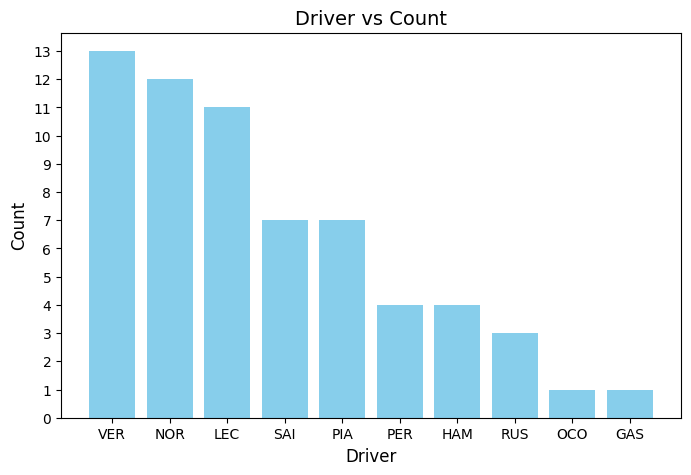

In [45]:
# Create bar chart
plt.figure(figsize=(8, 5))  # Optional: Set figure size
plt.bar(season_podiums_df["Driver"], season_podiums_df["count"], color='skyblue')

# Add labels and title
plt.xlabel("Driver", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Driver vs Count", fontsize=14)

# Set y-axis ticks to increment one by one
plt.yticks(range(0, max(season_podiums_df["count"]) + 1, 1))  # Start at 0, go to max count, step by 1

# Show the plot
plt.show()

### Qualifying

In [46]:
# #If I just input quali_df = results_df, I will find the 1st place grid positions, not pole positions
# quali_df = results_df.copy()

In [47]:
quali_df = pd.read_csv('data/gps_2024_season_quali.csv')

In [48]:
quali_df = quali_df[['Abbreviation', 'Position', 'EventName']]
quali_df = quali_df[quali_df['EventName'] != 'Pre-Season Testing']
quali_df = quali_df.rename(columns={'Abbreviation': 'Driver'})
quali_df.head()

,Driver,Position,EventName
20,VER,1.0,Bahrain Grand Prix
21,LEC,2.0,Bahrain Grand Prix
22,RUS,3.0,Bahrain Grand Prix
23,SAI,4.0,Bahrain Grand Prix
24,PER,5.0,Bahrain Grand Prix


#### Qualifying performance

In [49]:
quali_per_df = quali_df.copy()
quali_per_df.sample(5)

,Driver,Position,EventName
338,ZHO,20.0,Italian Grand Prix
322,LEC,4.0,Italian Grand Prix
46,RUS,7.0,Saudi Arabian Grand Prix
421,TSU,3.0,São Paulo Grand Prix
388,PER,10.0,United States Grand Prix


In [50]:
driver_list = ['NOR', 'PIA']
quali_per_df = quali_per_df[quali_per_df['Driver'].isin(driver_list)]
quali_per_df.head()

,Driver,Position,EventName
26,NOR,7.0,Bahrain Grand Prix
27,PIA,8.0,Bahrain Grand Prix
44,PIA,5.0,Saudi Arabian Grand Prix
45,NOR,6.0,Saudi Arabian Grand Prix
63,NOR,4.0,Australian Grand Prix


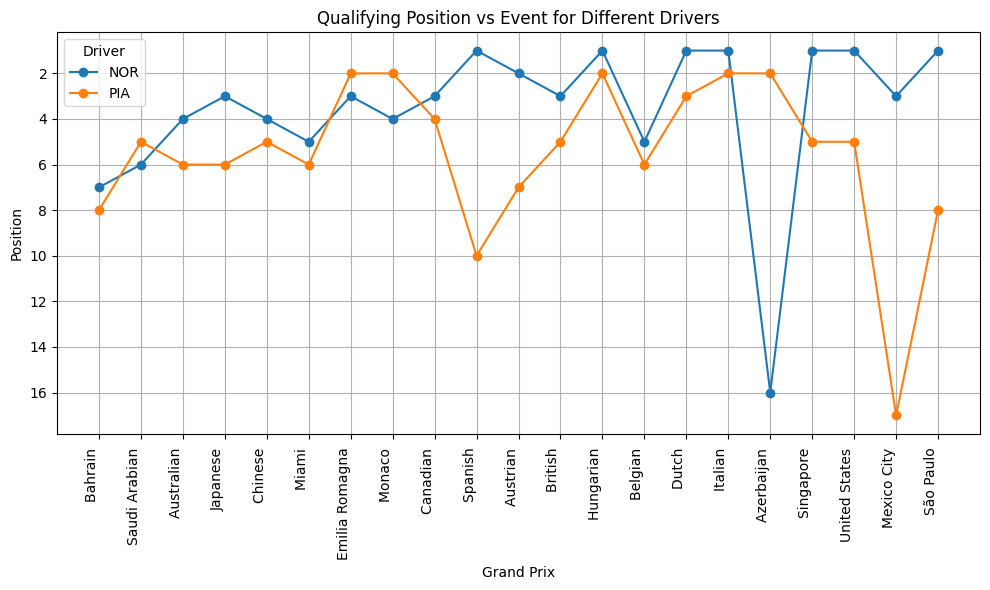

In [51]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))

# # Group by 'driver' and plot each driver's data
# for driver, data in quali_per_df.groupby('Driver'):
#     short_event = data['EventName'].apply(lambda x: x.replace('Grand Prix', ''))
#     plt.plot(short_event, data['Position'], label=driver)

# Adding markers to the plot
for driver, data in quali_per_df.groupby('Driver'):
    short_event = data['EventName'].apply(lambda x: x.replace('Grand Prix', ''))
    plt.plot(short_event, data['Position'], label=driver, marker='o')


# Adding labels and legend
plt.xlabel('Grand Prix')
plt.ylabel('Position')
plt.title(f'Qualifying Position vs Event for Different Drivers')
plt.legend(title='Driver')
plt.gca().invert_yaxis()  # Optional: Reverse y-axis so 1st position is at the top
plt.xticks(rotation=90, ha='right')  # Adjust rotation angle as needed
plt.tight_layout()  # Automatically adjust padding
plt.grid()
plt.show()


The pivot function in pandas is used to reshape the DataFrame, essentially transforming or "pivoting" the data such that unique values from one column become new columns, while other columns are used as row indices.

In [52]:
# Pivot the DataFrame for easier comparison by EventName
pivoted = quali_per_df.pivot(index='EventName', columns='Driver', values='Position')

In [53]:
pivoted.head()

Driver,NOR,PIA
EventName,,
Australian Grand Prix,4.0,6.0
Austrian Grand Prix,2.0,7.0
Azerbaijan Grand Prix,16.0,2.0
Bahrain Grand Prix,7.0,8.0
Belgian Grand Prix,5.0,6.0


In [54]:
# Add a column to indicate which driver has the lower position
pivoted['BetterDriver'] = pivoted.idxmin(axis=1)  # Find the driver with the minimum position

In [55]:
outquali_df = pd.DataFrame(pivoted['BetterDriver'].value_counts())
outquali_df = outquali_df.reset_index()
outquali_df

,BetterDriver,count
0,NOR,17
1,PIA,4


In [56]:
better_driver = outquali_df.loc[outquali_df['count'].idxmax(), 'BetterDriver']
better_driver

'NOR'

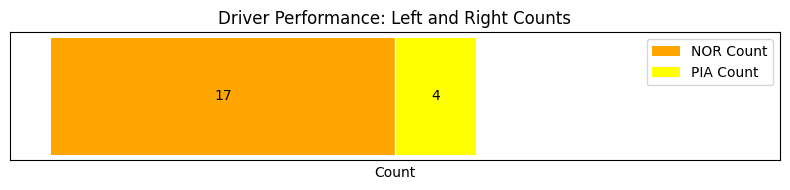

In [57]:
drivers, counts = outquali_df['BetterDriver'], outquali_df['count']

# Set the figure size for better spacing
plt.figure(figsize=(8, 2))

# Plot left bar for NOR (negative value to extend left), with smaller width (height)
plt.barh(0, -counts[0], color='orange', label=f'{drivers[0]} Count', align='center')
# Plot right bar for PIA (positive value to extend right), with smaller width (height)
plt.barh(0, counts[1], color='yellow', label=f'{drivers[1]} Count', align='center')

# Add labels and title
plt.xlabel('Count')
plt.title('Driver Performance: Left and Right Counts')

# Add a vertical line at center (for visual separation)
plt.axvline(0, color='white', linewidth=1)

# Add the legend to differentiate the bars
plt.legend()

# Remove y-axis ticks (since we have only one row)
plt.yticks([])

# Remove x-axis ticks
plt.xticks([])

# Adjust the x-axis limits to give some space around the bars
plt.xlim(-max(counts)-2, max(counts)+2)

# Place the count values inside the bars
# For the left bar
plt.text(-counts[0]/2, 0, str(counts[0]), color='black', ha='center', va='center')
# For the right bar
plt.text(counts[1]/2, 0, str(counts[1]), color='black', ha='center', va='center')

# Show plot
plt.tight_layout()
plt.show()

Extend this by:
 - Having specific color for each driver (need to think for global solution, that is other plots)
 - Making it for multiple teams (pairs of drivers)

#### Highest number of pole positions this season?

In [58]:
pol_df = quali_df.copy()
pol_df = pol_df[pol_df['Position'] == 1]
pol_df.sample(5)

,Driver,Position,EventName
259,NOR,1.0,Hungarian Grand Prix
139,VER,1.0,Emilia Romagna Grand Prix
199,NOR,1.0,Spanish Grand Prix
399,SAI,1.0,Mexico City Grand Prix
20,VER,1.0,Bahrain Grand Prix


In [59]:
pol_df['Driver'].value_counts()

Driver
VER    9
NOR    7
LEC    2
RUS    2
SAI    1
Name: count, dtype: int64

In [60]:
pol_df['Driver'].value_counts().idxmax()

'VER'